In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [152]:
dataset = pd.read_csv('/Users/julsmith/Desktop/thirdDown.csv')
dataset.head(10)

,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,0,190,2018090600,1,0,10,39,pass,1681,3,deep,deep,NaN,0,0.415009,0.333712,2.250232,1
1,1,256,2018090600,1,0,1,1,pass,1559,3,short,short,NaN,0,0.204515,0.749825,5.661931,0
2,2,344,2018090600,1,0,4,92,pass,1464,3,short,short,NaN,0,0.093928,0.213978,-1.832560,0
3,3,445,2018090600,1,0,5,39,run,1404,3,NaN,NaN,right,0,0.395592,0.377457,2.642543,1
4,4,636,2018090600,1,0,3,3,pass,1207,3,short,short,NaN,0,0.386222,0.567801,4.926552,0
5,5,839,2018090600,1,0,12,59,pass,981,3,NaN,NaN,NaN,-3,0.272244,0.291378,0.687785,0
6,6,949,2018090600,1,0,12,82,pass,900,3,short,short,NaN,3,0.133984,0.205101,-1.377900,0
7,7,1037,2018090600,1,0,7,57,pass,773,3,short,short,NaN,-3,0.269825,0.319773,1.193780,1
8,8,1160,2018090600,1,1,1,22,run,613,3,NaN,NaN,left,-3,0.415125,0.454985,3.967255,1
9,9,1344,2018090600,1,0,18,18,pass,413,3,short,short,NaN,-3,0.640069,0.255746,3.489784,0


In [153]:
Pass = dataset.loc[dataset['play_type'] == 'pass']
Pass.head(10)
Passtwo = Pass.loc[Pass['third_down_converted']== 1.0]
Passtwo.head(10)
Passtwo.dtypes
Passtwo["pass_length"] = Passtwo["pass_length"].replace(["deep","short"],[1,0])
Passtwo.head(10)
Passtwo["play_type"] = Passtwo["play_type"].replace(["pass"],[1])
Passtwo = Passtwo.fillna(0)
Passtwo.head()


C:\Users\julsmith\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\julsmith\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,play_type,half_seconds_remaining,down,pass_length,pass_length.1,run_location,score_differential,fg_prob,td_prob,ep,third_down_converted
0,0,190,2018090600,1,0,10,39,1,1681,3,1.0,deep,0,0,0.415009,0.333712,2.250232,1
7,7,1037,2018090600,1,0,7,57,1,773,3,0.0,short,0,-3,0.269825,0.319773,1.193780,1
15,15,2736,2018090600,1,0,5,41,1,1361,3,0.0,short,0,-3,0.382259,0.376644,2.525812,1
16,16,2811,2018090600,1,0,8,24,1,1260,3,0.0,short,0,-3,0.508150,0.345595,3.194153,1
26,26,877,2018090900,1,0,6,19,1,1070,3,0.0,short,0,7,0.525209,0.355708,3.477967,1


In [154]:
Passtwo.shape

(13473, 18)

In [142]:
X = Passtwo[["ydstogo", "no_huddle", "yardline_100", "half_seconds_remaining","play_type"]]
#X = np.transpose(X)
X.shape

(13473, 5)

In [143]:
y = Passtwo["pass_length"]
y.shape

(13473,)

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [145]:
model = LogisticRegression()  
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\julsmith\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8296230335411101

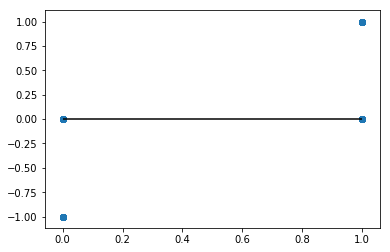

In [149]:
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y = label_encoder.transform(y_test)

predictions = model.predict(X_test)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()



In [150]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])